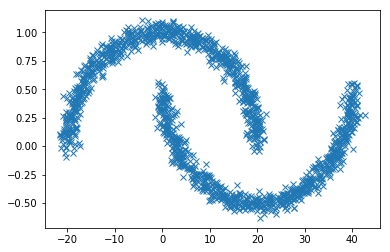

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X= noisy_moons[0]
y= noisy_moons[1]

X[:,0] = 20*X[:,0]

plt.plot(X[:,0], X[:,1], 'x')
plt.show()

In [80]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def RedNeuronal(X,y,alpha,epochs): 
    w_1 = np.random.rand(2,X.shape[1]+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de features mas el bias
    w_2 = np.random.rand(2,2+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de neuronas mas el bias
    w_3 = np.random.rand(3,2+1) #3 Neuronas de la capa de salida, y en la capa actual el numero de neuronas mas el bias
    
    

    for j in range(0,epochs):
        J = 0
        for i in range(0,X.shape[0]):
            
            #One hot encoding
            Y = np.zeros(shape=(3,1))
            Y[y[i]] = 1

            #Forward
            #Para cada muestra
            a_1 = X[i,None].T
            #Se agrega el bias de la capa entrada
            a_1 = np.insert(a_1, 0, 1,axis=0) 
            z_1 = np.dot(w_1,a_1)
            a_2 = sigmoid(z_1)
            #Se agrega el bias de la otra capa
            a_2 = np.insert(a_2, 0, 1,axis=0) 
            z_2 = np.dot(w_2,a_2)
            a_3 = sigmoid(z_2)
            #Se agrega el bias de la otra capa
            a_3 = np.insert(a_3, 0, 1,axis=0)
            z_3 = np.dot(w_3,a_3)
            a_4 = sigmoid(z_3)

            #Backward
            J = J + np.dot((Y-a_4).T,(Y-a_4))
            d_4 = (Y-a_4)*d_sigmoid(z_3)

            d_3 = np.dot(w_3.T,d_4)
            d_3 = np.delete(d_3, 0,axis=0) #Remove d_0
            d_3 = d_3*d_sigmoid(z_2)

            d_2 = np.dot(w_2.T,d_3)
            d_2 = np.delete(d_2, 0,axis=0) #Remove d_0
            d_2 = d_2*d_sigmoid(z_1)

            DE_dw_3 = -np.dot(d_4,a_3.T)
            DE_dw_2 = -np.dot(d_3,a_2.T)
            DE_dw_1 = -np.dot(d_2,a_1.T)

            w_3 = w_3 - alpha*DE_dw_3
            w_2 = w_2 - alpha*DE_dw_2
            w_1 = w_1 - alpha*DE_dw_1

        print(J/2)
    return [w_1,w_2,w_3]

def Predict(X,w_1,w_2,w_3): 
    #Forward
    #Para cada muestra
    a_1 = X[:,None]
    #Se agrega el bias de la capa entrada
    a_1 = np.insert(a_1, 0, 1,axis=0) 
    z_1 = np.dot(w_1,a_1)
    a_2 = sigmoid(z_1)
    #Se agrega el bias de la otra capa
    a_2 = np.insert(a_2, 0, 1,axis=0) 
    z_2 = np.dot(w_2,a_2)
    a_3 = sigmoid(z_2)
    #Se agrega el bias de la otra capa
    a_3 = np.insert(a_3, 0, 1,axis=0)
    z_3 = np.dot(w_3,a_3)
    a_4 = sigmoid(z_3)
    return a_4

In [81]:
[w1,w2,w3] = RedNeuronal(X,y,alpha=0.1,epochs=20)

[[ 398.37922294]]
[[ 327.85836397]]
[[ 281.39596565]]
[[ 270.65703039]]
[[ 267.54898484]]
[[ 265.9418838]]
[[ 264.85936903]]
[[ 264.03744156]]
[[ 263.36874505]]
[[ 262.79778484]]
[[ 262.29184602]]
[[ 261.82989641]]
[[ 261.39734798]]
[[ 260.98323427]]
[[ 260.57850882]]
[[ 260.17485142]]
[[ 259.7636134]]
[[ 259.33458021]]
[[ 258.8740998]]
[[ 258.36166224]]


In [82]:
predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X[i],w1,w2,w3)))

# Este es el rendimiento del entrenamiento sin estandizar los datos

In [83]:
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print(Accuracy)

0.742


# Estandarizando con Min-Max
$$X_{norm} = \frac{X-\min(X)}{\max(X)-\min(X)}$$

In [84]:
X_norm = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización MIN-MAX',Accuracy)

[[ 401.36860428]]
[[ 377.68187363]]
[[ 377.04025329]]
[[ 376.49063628]]
[[ 375.53823325]]
[[ 372.89992426]]
[[ 360.95060436]]
[[ 292.01604602]]
[[ 181.79599849]]
[[ 145.82708695]]
[[ 135.13985497]]
[[ 130.82105336]]
[[ 128.93955794]]
[[ 128.07203429]]
[[ 127.63419616]]
[[ 127.38291607]]
[[ 127.21329146]]
[[ 127.07775621]]
[[ 126.95357564]]
[[ 126.82923247]]
Accuracy con estandarización MIN-MAX 0.885333333333


# Estandarizando con Zscore
$$X_{norm} = \frac{X-\mu}{\sigma}$$

In [85]:
X_norm = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización MIN-MAX',Accuracy)

[[ 402.6437039]]
[[ 369.32461014]]
[[ 296.70339228]]
[[ 169.43676866]]
[[ 138.9072765]]
[[ 132.76610153]]
[[ 130.40737724]]
[[ 129.02829189]]
[[ 128.03153269]]
[[ 127.24707525]]
[[ 126.6118573]]
[[ 126.09140238]]
[[ 125.65947027]]
[[ 125.29397933]]
[[ 124.97677302]]
[[ 124.69361421]]
[[ 124.43379129]]
[[ 124.18948572]]
[[ 123.95508986]]
[[ 123.72657969]]
Accuracy con estandarización MIN-MAX 0.886


## Dependiendo de los rangos de los datos, algunas estandarizaciones pueden funcionar mejor que otras. También dependiendo de la estandarización va a cambiar el alpha que sea ideal.

## Veamos como luce la frontera de división de clases

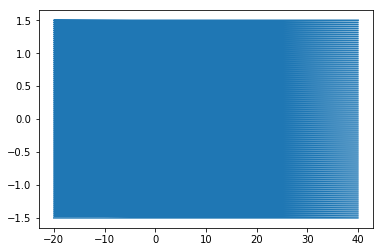

In [86]:
x1 = np.linspace(-20,40,1000)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)
plt.show() #Estamos llenando la superficie de puntos, para luego evaluarlos en la red neuronal

Xnew = np.concatenate((x1,x2),axis=1)

In [87]:
X_norm = (Xnew-np.mean(X,axis=0))/(np.std(X,axis=0))
predicted = list()
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))

predicted = np.array(predicted)

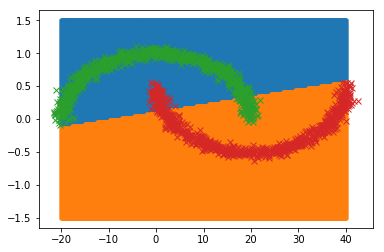

In [88]:
plt.plot(Xnew[predicted==0,0],Xnew[predicted==0,1],'.')
plt.plot(Xnew[predicted==1,0],Xnew[predicted==1,1],'.')
plt.plot(X[y==0,0], X[y==0,1], 'x')
plt.plot(X[y==1,0], X[y==1,1], 'x')

plt.show()

# Cambiemos la arquitectura de la red

In [25]:
def RedNeuronal(X,y,alpha,epochs): 
    w_1 = np.random.rand(10,X.shape[1]+1) #(10) Neuronas de la capa siguiente, y en la capa actual el numero de features mas el bias
    w_2 = np.random.rand(10,10+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de neuronas (10) mas el bias
    w_3 = np.random.rand(3,10+1) #3 Neuronas de la capa de salida, y en la capa actual el numero de neuronas (10) mas el bias
    
    

    for j in range(0,epochs):
        J = 0
        for i in range(0,X.shape[0]):
            
            #One hot encoding
            Y = np.zeros(shape=(3,1))
            Y[y[i]] = 1

            #Forward
            #Para cada muestra
            a_1 = X[i,None].T
            #Se agrega el bias de la capa entrada
            a_1 = np.insert(a_1, 0, 1,axis=0) 
            z_1 = np.dot(w_1,a_1)
            a_2 = sigmoid(z_1)
            #Se agrega el bias de la otra capa
            a_2 = np.insert(a_2, 0, 1,axis=0) 
            z_2 = np.dot(w_2,a_2)
            a_3 = sigmoid(z_2)
            #Se agrega el bias de la otra capa
            a_3 = np.insert(a_3, 0, 1,axis=0)
            z_3 = np.dot(w_3,a_3)
            a_4 = sigmoid(z_3)

            #Backward
            J = J + np.dot((Y-a_4).T,(Y-a_4))
            d_4 = (Y-a_4)*d_sigmoid(z_3)

            d_3 = np.dot(w_3.T,d_4)
            d_3 = np.delete(d_3, 0,axis=0) #Remove d_0
            d_3 = d_3*d_sigmoid(z_2)

            d_2 = np.dot(w_2.T,d_3)
            d_2 = np.delete(d_2, 0,axis=0) #Remove d_0
            d_2 = d_2*d_sigmoid(z_1)

            DE_dw_3 = -np.dot(d_4,a_3.T)
            DE_dw_2 = -np.dot(d_3,a_2.T)
            DE_dw_1 = -np.dot(d_2,a_1.T)

            w_3 = w_3 - alpha*DE_dw_3
            w_2 = w_2 - alpha*DE_dw_2
            w_1 = w_1 - alpha*DE_dw_1

        print(J/2)
    return [w_1,w_2,w_3]

In [42]:
X_norm = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización MIN-MAX',Accuracy)

[[ 664.97660719]]
[[ 364.53591895]]
[[ 176.21069402]]
[[ 139.07732656]]
[[ 132.67852707]]
[[ 129.76189736]]
[[ 126.81040695]]
[[ 121.82743266]]
[[ 111.66700084]]
[[ 91.90956715]]
[[ 65.71501192]]
[[ 43.96764909]]
[[ 30.01649335]]
[[ 21.58297626]]
[[ 16.32334185]]
[[ 12.86587606]]
[[ 10.47658003]]
[[ 8.75379089]]
[[ 7.46693777]]
[[ 6.47705275]]
Accuracy con estandarización MIN-MAX 1.0


# 100% de accuracy!! Obviamente estamos sobreentrenando, debemos implementar una validación cruzada o bootstraping para encontrar la mejor arquitectura

## Veamos como luce la frontera de división de clases

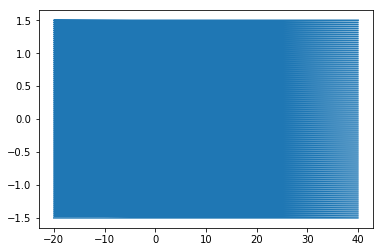

In [74]:
x1 = np.linspace(-20,40,1000)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)
plt.show() #Estamos llenando la superficie de puntos, para luego evaluarlos en la red neuronal

Xnew = np.concatenate((x1,x2),axis=1)

In [75]:
X_norm = (Xnew-np.mean(X,axis=0))/(np.std(X,axis=0))
predicted = list()
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))

predicted = np.array(predicted)

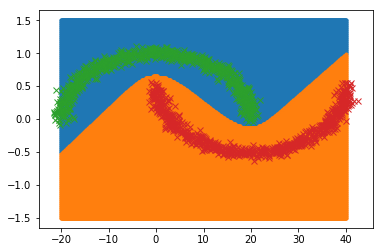

In [77]:
plt.plot(Xnew[predicted==0,0],Xnew[predicted==0,1],'.')
plt.plot(Xnew[predicted==1,0],Xnew[predicted==1,1],'.')
plt.plot(X[y==0,0], X[y==0,1], 'x')
plt.plot(X[y==1,0], X[y==1,1], 'x')

plt.show()